![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Análisis de datos EDA

Este segundo paso reslizaremos un análisis exploratorio de los datos de las columnas de nuetras BBDD limpia que sustraemos despues del procedimiento de ETL. Preveeremos las cualidades de los datos de las columnas, procederemos a agregar, eliminar y/o modificar la Data si es necesario para una mejora sustancial de nuestro proximo paso: Entenamiento y Predicion de nuestro modelo.

### Importando librerías <br>
Se llamará a las librerías necesarias para proceder a un correcto EDA de la BBDD

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from itertools import cycle
from sklearn.preprocessing import LabelEncoder

### Carga de datos:<br>
Se abre el archivo .csv con pandas y lo visualizamos mediante un DataFrame

In [2]:
df = pd.read_csv("D:\\Disco C.2\\SOYHENRY\\Mis Proyectos El Mayki\\Proyecto_Integrador_M6\\ProyectoHospitalizacion\\1. ETL\\BBDD_Hospitalización_2.csv")

Analizamos la descripcion estadistica correspondientes a la tabla de nuestra BBDD

In [4]:
df.describe()

,EDAD,DIABETES,HOSPITALIZACIÓN ÚLTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTÁTICO,NÚMERO DE MUESTRAS TOMADAS,CUP,ENFERMEDAD CRÓNICA PULMONAR OBSTRUCTIVA,NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,HOSPITALIZACIÓN,DÍAS HOSPITALIZACIÓN MQ,DÍAS HOSPITALIZACIÓN UPC
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,63.846868,0.118329,0.009281,14.295035,0.102088,0.709977,12.911833,0.006961,0.032483,0.169374,0.083527,0.013921,0.053364,0.211137,0.018561
std,8.241400,0.323373,0.096000,17.454666,0.303116,0.454300,4.008900,0.083236,0.177484,0.847206,0.276998,0.117300,0.225020,1.086692,0.225427
min,39.000000,0.000000,0.000000,0.600000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,5.700000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,0.000000,0.000000,8.100000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,0.000000,0.000000,16.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,100.000000,1.000000,1.000000,24.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,12.000000,3.000000


In [7]:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ÚLTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTÁTICO',
       'ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS', 'NÚMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENFERMEDAD CRÓNICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRÓN DE RESISTENCIA', 'HOSPITALIZACIÓN', 'DÍAS HOSPITALIZACIÓN MQ',
       'DÍAS HOSPITALIZACIÓN UPC'],
      dtype='object')

Columnas de Variables Numericas y categoricas:
'EDAD',
'PSA',
'NÚMERO DE MUESTRAS TOMADAS',
'NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
'DÍAS HOSPITALIZACIÓN MQ',
'DÍAS HOSPITALIZACIÓN UPC'

Columnas de Variables Ordnales:
'DIABETES',
'HOSPITALIZACIÓN ÚLTIMO MES',
'BIOPSIAS PREVIAS',
'VOLUMEN PROSTÁTICO',
'ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS',
'CUP',
'ENFERMEDAD CRÓNICA PULMONAR OBSTRUCTIVA',
'BIOPSIA',
'FIEBRE',
'ITU',
'TIPO DE CULTIVO',
'AGENTE AISLADO',
'PATRÓN DE RESISTENCIA',
'HOSPITALIZACIÓN'<br><br>





In [8]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ÚLTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTÁTICO,ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS,NÚMERO DE MUESTRAS TOMADAS,CUP,ENFERMEDAD CRÓNICA PULMONAR OBSTRUCTIVA,BIOPSIA,NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRÓN DE RESISTENCIA,HOSPITALIZACIÓN,DÍAS HOSPITALIZACIÓN MQ,DÍAS HOSPITALIZACIÓN UPC
0,53,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,NEGATIVO,1,1,0,NO,NO,NO,1,2,0
1,56,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,NEGATIVO,1,1,0,NO,NO,NO,1,5,0
2,57,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,24,0,0,NEGATIVO,1,1,0,HEMOCULTIVO,E.COLI,"R AMPI, R CIPRO, R GENTA, R SULFA",1,4,3
3,56,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,NEGATIVO,1,1,0,NO,NO,NO,1,5,0
4,55,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,24,0,0,NEGATIVO,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,55,0,0,5.0,0,0,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,ADENOCARCINOMA GLEASON 7,0,0,0,NO,NO,NO,0,0,0
427,70,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,NEGATIVO,0,0,0,NO,NO,NO,0,0,0
428,75,0,0,75.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,ADENOCARCINOMA GLEASON 8,0,0,0,NO,NO,NO,0,0,0
429,67,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,ADENOCARCINOMA GLEASON 6,0,0,0,NO,NO,NO,0,0,0


Ploteamos las columnas de la tabla para analizar los las cualidades de los Datos.

Columnas de variables continuas

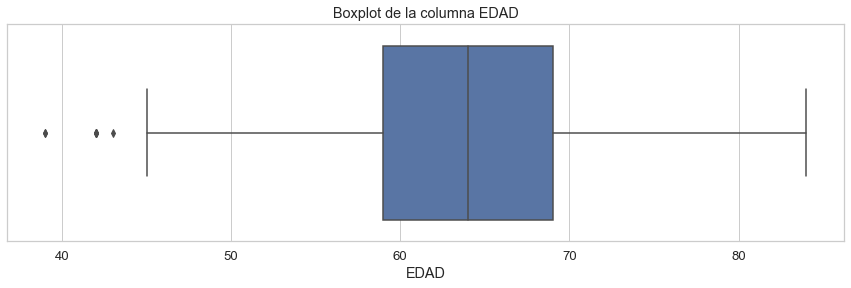

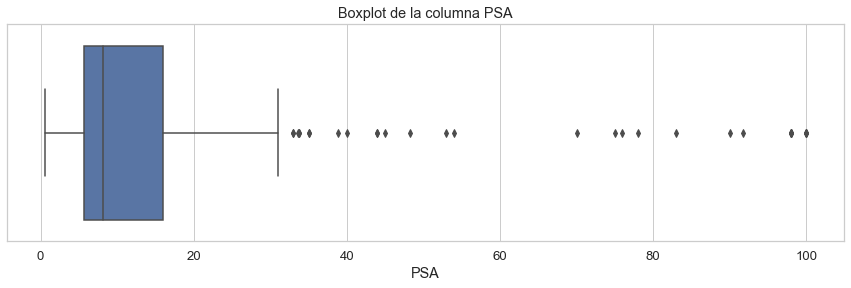

In [49]:
# Visualización de Edad y PSA
categorias = ['EDAD', 'PSA']

for categoria in categorias: #para cada columna en categorias se creara una imagen
    plt.figure(figsize=(15, 4)) # para cada imagen abrimos una pantalla de medida 15x4 pulgadas
    sns.boxplot(data=df, x=df[categoria]) #usamos seaborn para crear la vela japonesa o boxplot
    plt.title(f'Boxplot de la columna {categoria}') #poniendo titulo a cada imagen
    plt.show()#mostrando la imagen

Analizando la columna EDAD, observamos los siguientes datos:

    * Rango: El rango de la edad es de 39 a 84 años.
    * Mediana: La mediana de la edad es de 64 años.
    * Primer cuartil (Q1): El primer cuartil de la edad es de 59 años.
    * Tercer cuartil (Q3): El tercer cuartil de la edad es de 69 años.
    * Valores atípicos: No hay valores atípicos en la columna EDAD.

Analizando la columna PSA, observamos los siguientes datos:

    * Rango: El rango del PSA es de 0.6 a 100 unidades.
    * Mediana: La mediana del PSA es de 8.1 unidades.
    * Primer cuartil (Q1): El primer cuartil del PSA es de 5.7 unidades.
    * Tercer cuartil (Q3): El tercer cuartil del PSA es de 16 unidades.
    * Valores atípicos: Hay un valor atípico en la columna PSA, que es mayor a 100 unidades.

Columnas de variables categoricas

In [46]:
df["NÚMERO DE MUESTRAS TOMADAS"].unique()

array([12, 24, 18,  6, 16, 10,  4,  8, 15, 22, 14, 20], dtype=int64)

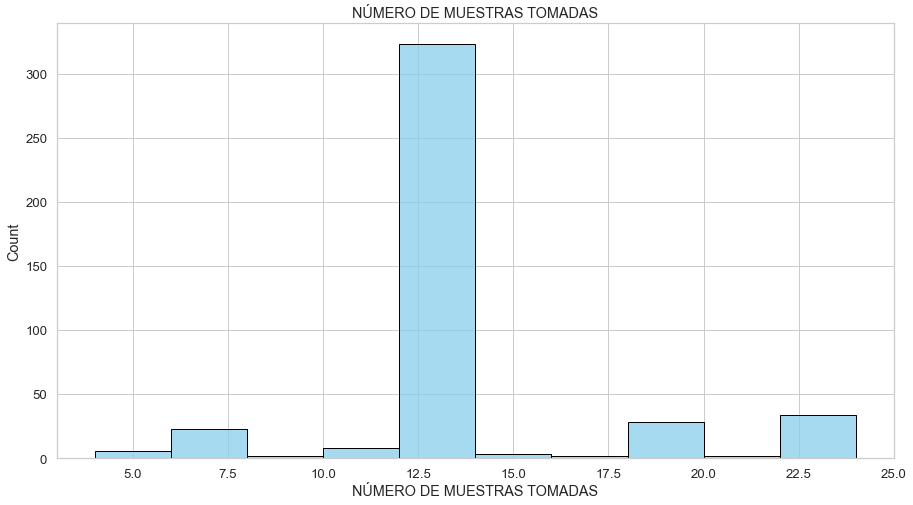

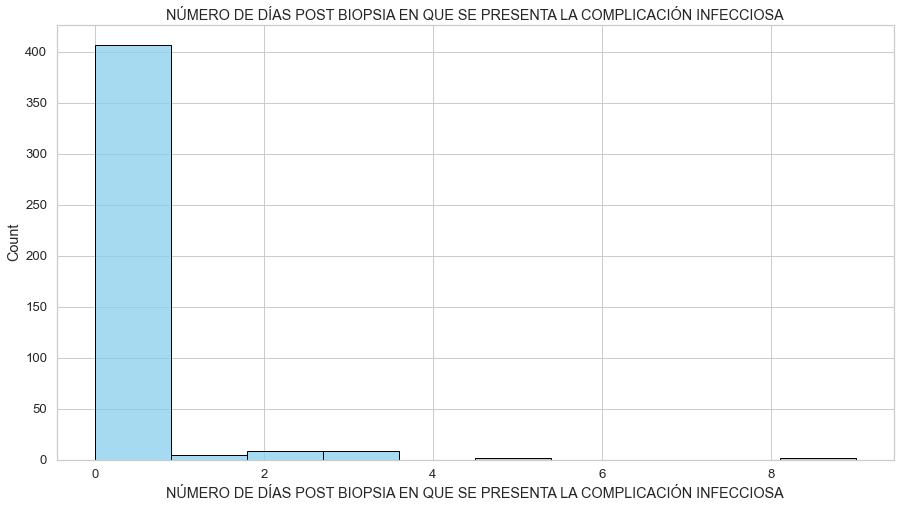

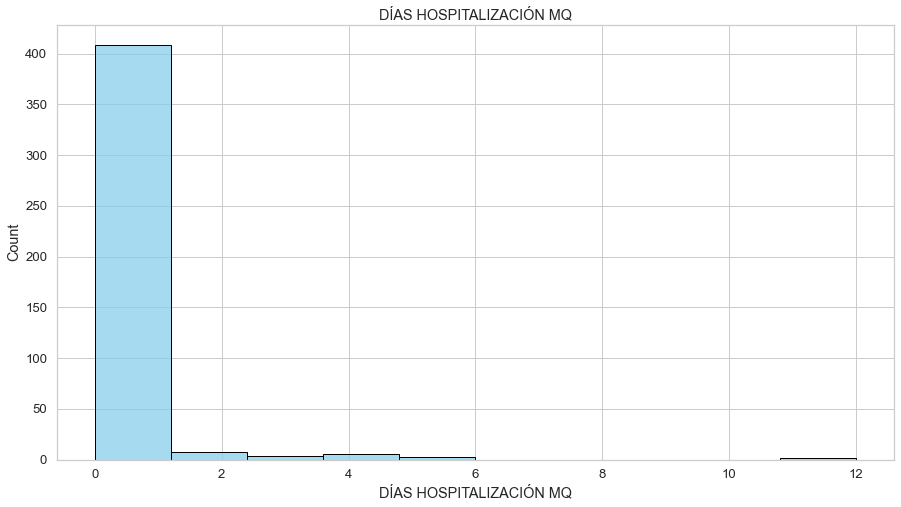

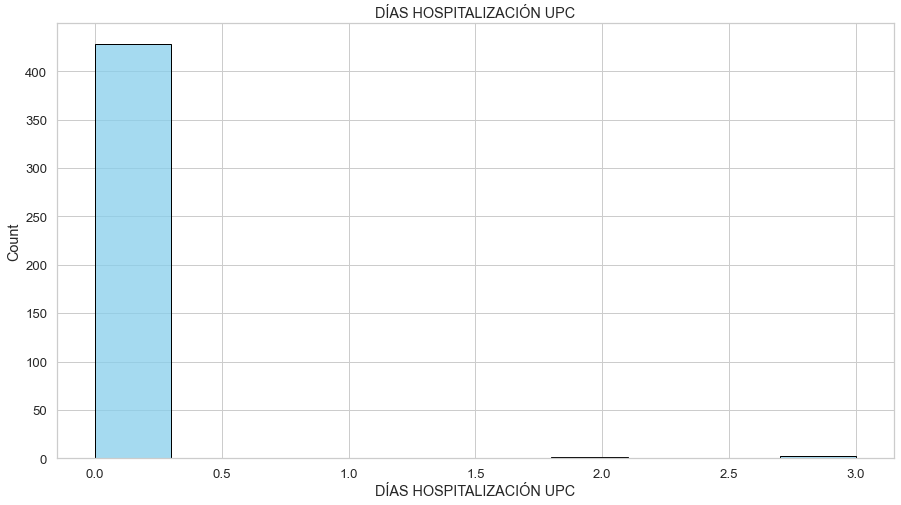

In [100]:
# Lista de columnas categóricas para generar histogramas
categorias = ['NÚMERO DE MUESTRAS TOMADAS', 
            'NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 
            'DÍAS HOSPITALIZACIÓN MQ', 
            'DÍAS HOSPITALIZACIÓN UPC']

for categoria in categorias: #para cada columna en categorias se creara una imagen
    plt.figure(figsize=(15, 8)) # para cada imagen abrimos una pantalla de medida 15x4 pulgadas
    sns.histplot(data=df, x=df[categoria], multiple="dodge", color='skyblue', edgecolor='black') #usamos seaborn para crear la vela japonesa o boxplot
    plt.title(f'{categoria}') #poniendo titulo a cada imagen
    plt.show()#mostrando la imagen

Analizando la columna NÚMERO DE MUESTRAS TOMADAS, observamos los siguientes datos:

    * Rango: El rango del NÚMERO DE MUESTRAS TOMADAS es de 4 a 24 unidades. --> siempre se toma muestras
    * Media: La mediana del NÚMERO DE MUESTRAS TOMADAS es de 19.92 unidades. --> este es el numero de muestras promedio o que mas se toman en numero de pruebas

In [59]:
parte1 = len(df[df["NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"]==0])#.count() #contando las filas con valor 0
todo1 = len(df)
print(f"El {round(parte1*100/todo1,2)}% de los datos confirman que a penas se hacen la biopsia presentan complicaciones")
#por tanto 406*100/431= 95%

El 94.2% de los datos confirman que a penas se hacen la biopsia presentan complicaciones


Analizando la columna NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA, observamos los siguientes datos:

    * Rango: El rango del NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA es de 0 a 9 unidades. --> pueden presentar complicaciones en mismo dias o hasta 9 dias segun los registros
    * Media: La mediana del NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA es de 0.16 unidades. --> Confirmamos que el 94.2% de los datos confirman que a penas se hacen la biopsia presentan complicaciones

In [61]:
parte1 = len(df[df["DÍAS HOSPITALIZACIÓN MQ"]==0])#.count() #contando las filas con valor 0
todo1 = len(df)
print(f"El {round(parte1*100/todo1,2)}% de los datos confirman que no se hopitalizan por MQ")
#por tanto 406*100/431= 95%

El 94.66% de los datos confirman que no se hopitalizan por MQ


Analizando la columna DÍAS HOSPITALIZACIÓN MQ, observamos los siguientes datos:

    * Rango: El rango del DÍAS HOSPITALIZACIÓN MQ es de 0 a 12 días. -- días de hospitalizacion 
    * Media: La mediana del DÍAS HOSPITALIZACIÓN MQ es de 0.21 días. --> indica que el 94.66% de los datos confirman que no se hopitalizan por MQ, aqui puede haber un sesgo ya que solo aprendera el por que no entra al hospital pero no el por que sí.

In [63]:
parte1 = len(df[df["DÍAS HOSPITALIZACIÓN UPC"]==0])#.count() #contando las filas con valor 0
todo1 = len(df)
print(f"El {round(parte1*100/todo1,2)}% de los datos confirman que no se hopitalizan por UPC")
#por tanto 406*100/431= 95%

El 99.3% de los datos confirman que no se hopitalizan por UPC


Analizando la columna DÍAS HOSPITALIZACIÓN UPC, observamos los siguientes datos:

    * Rango: El rango del DÍAS HOSPITALIZACIÓN UPC es de 0 a 3 días. --> dias de hospitalizacion por estado critico.
    * Media: La mediana del DÍAS HOSPITALIZACIÓN UPC es de 0.18 días. --> El 99.3% de los datos confirman que no se hopitalizan por UPC, aqui vemos o que no los hospitalizan o que no es critico la situacion del pasciente.

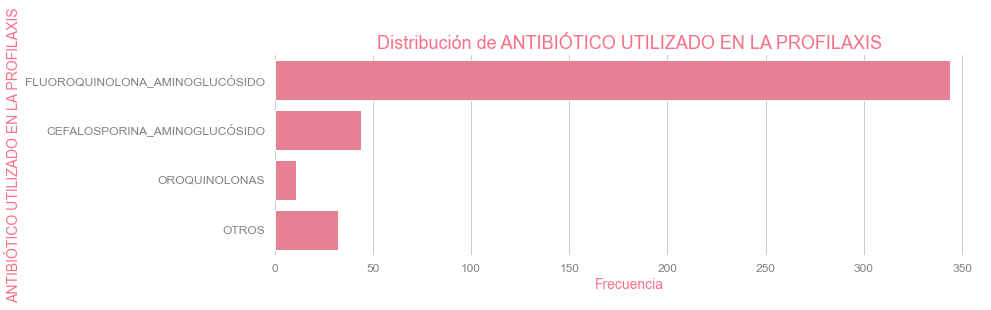

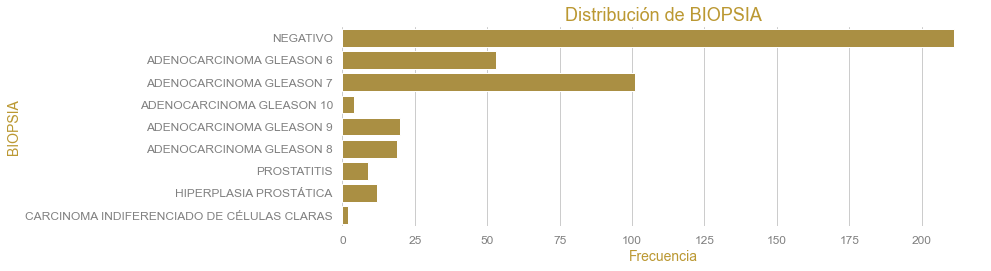

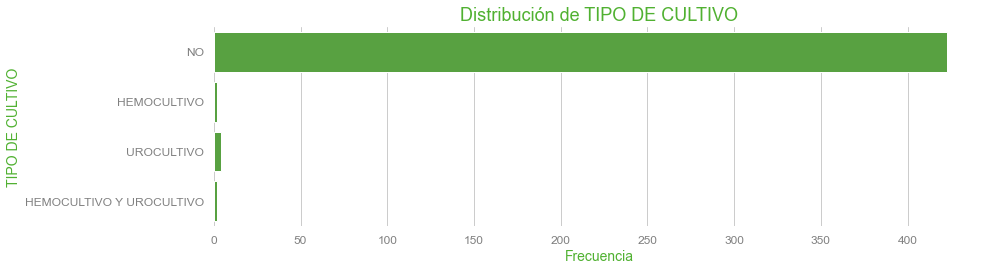

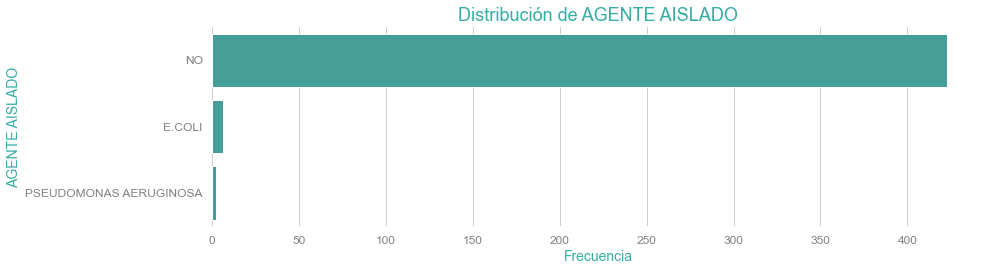

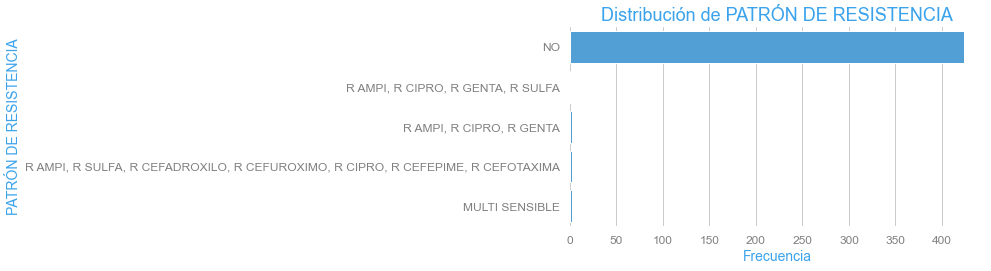

In [82]:
colors = cycle(sns.color_palette("husl"))

# Configuraciones globales de estilo
sns.set(style="whitegrid", font_scale=1.2)
# Lista de columnas categóricas para generar histogramas
categorias = ['ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS', 'BIOPSIA', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRÓN DE RESISTENCIA']

for columna in categorias:
    # Seleccionar un color de la paleta
    color = next(colors)
    
    # Configuraciones del gráfico
    plt.figure(figsize=(14, 4))
    sns.countplot(data=df, y=df[columna], palette=[color])
    plt.title(f'Distribución de {columna}', fontsize=18, color=color)
    plt.xlabel('Frecuencia', fontsize=14, color=color)
    plt.ylabel(columna, fontsize=14, color=color)
    plt.yticks(fontsize=12, color='gray')
    plt.xticks(fontsize=12, color='gray')
    
    # Estilo del fondo
    sns.despine(left=True, bottom=True)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()


Ploteando las columnas Binarias y algunas categoricas

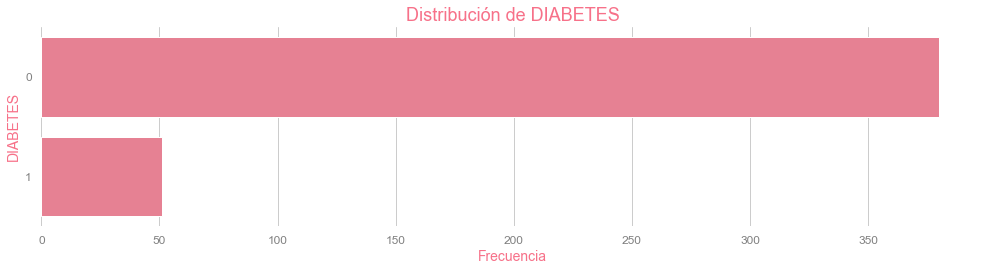

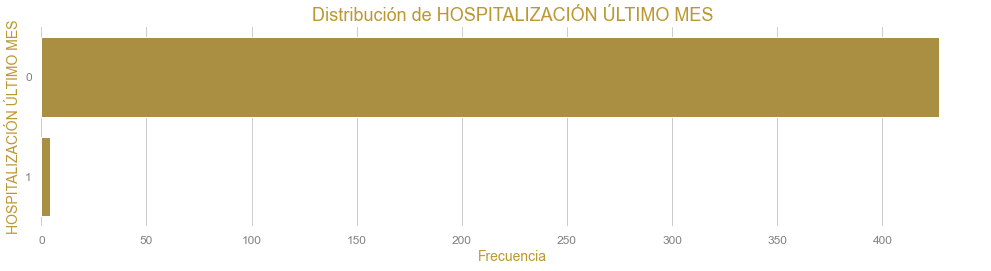

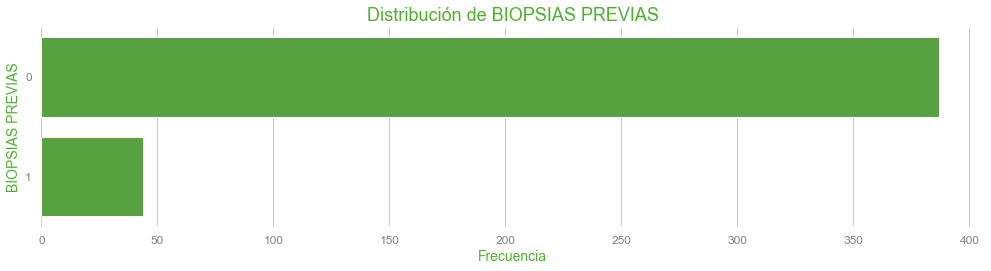

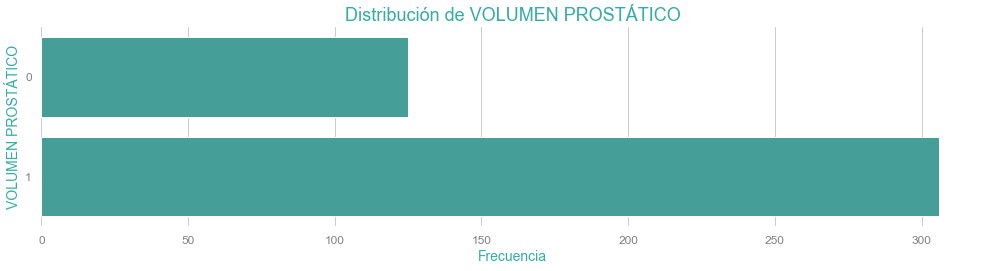

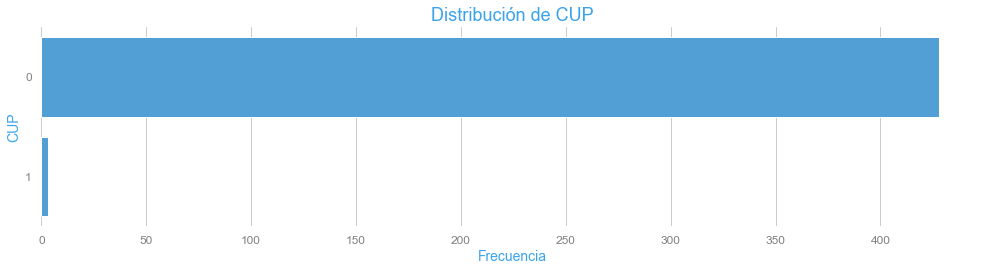

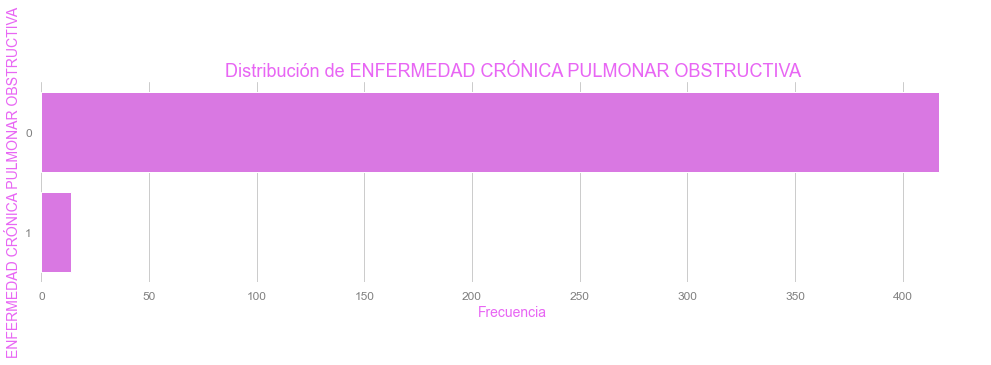

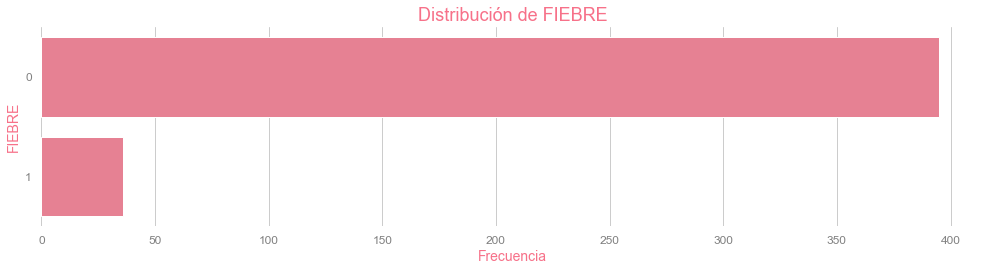

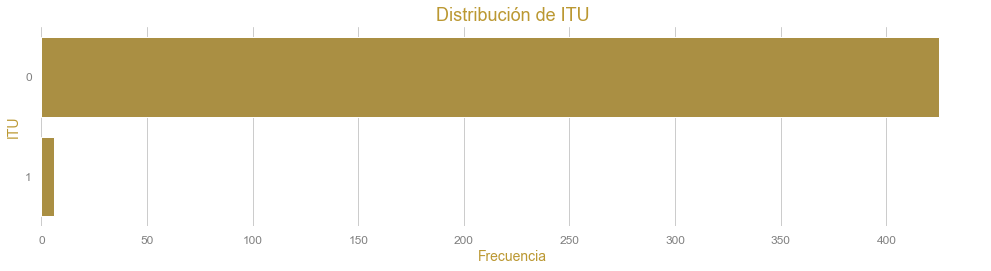

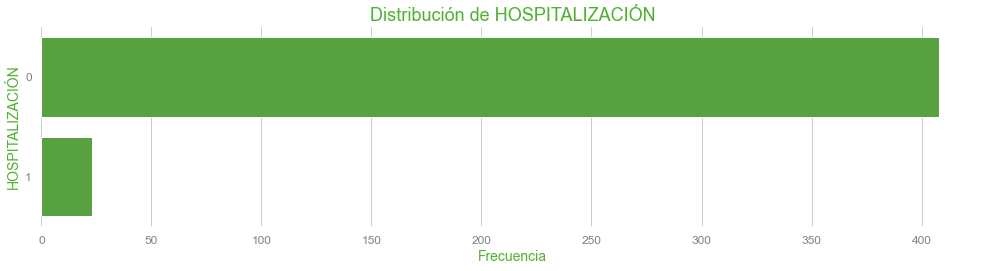

In [83]:
# Paleta de colores
colors = cycle(sns.color_palette("husl"))

# Configuraciones globales de estilo
sns.set(style="whitegrid", font_scale=1.2)

columnas = ['DIABETES', 'HOSPITALIZACIÓN ÚLTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTÁTICO', 'CUP', 
            'ENFERMEDAD CRÓNICA PULMONAR OBSTRUCTIVA', 
            'FIEBRE', 'ITU', 'HOSPITALIZACIÓN']

for columna in columnas:
    # Seleccionar un color de la paleta
    color = next(colors)
    
    # Configuraciones del gráfico
    plt.figure(figsize=(14, 4))
    sns.countplot(data=df, y=df[columna], palette=[color])
    plt.title(f'Distribución de {columna}', fontsize=18, color=color)
    plt.xlabel('Frecuencia', fontsize=14, color=color)
    plt.ylabel(columna, fontsize=14, color=color)
    plt.yticks(fontsize=12, color='gray')
    plt.xticks(fontsize=12, color='gray')
    
    # Estilo del fondo
    sns.despine(left=True, bottom=True)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()


## Correlación
Para finalizar, se analiza la correlación entre las variables que quedan del dataset para identificar variables con alta correlación entre sí o con la variable objetivo.

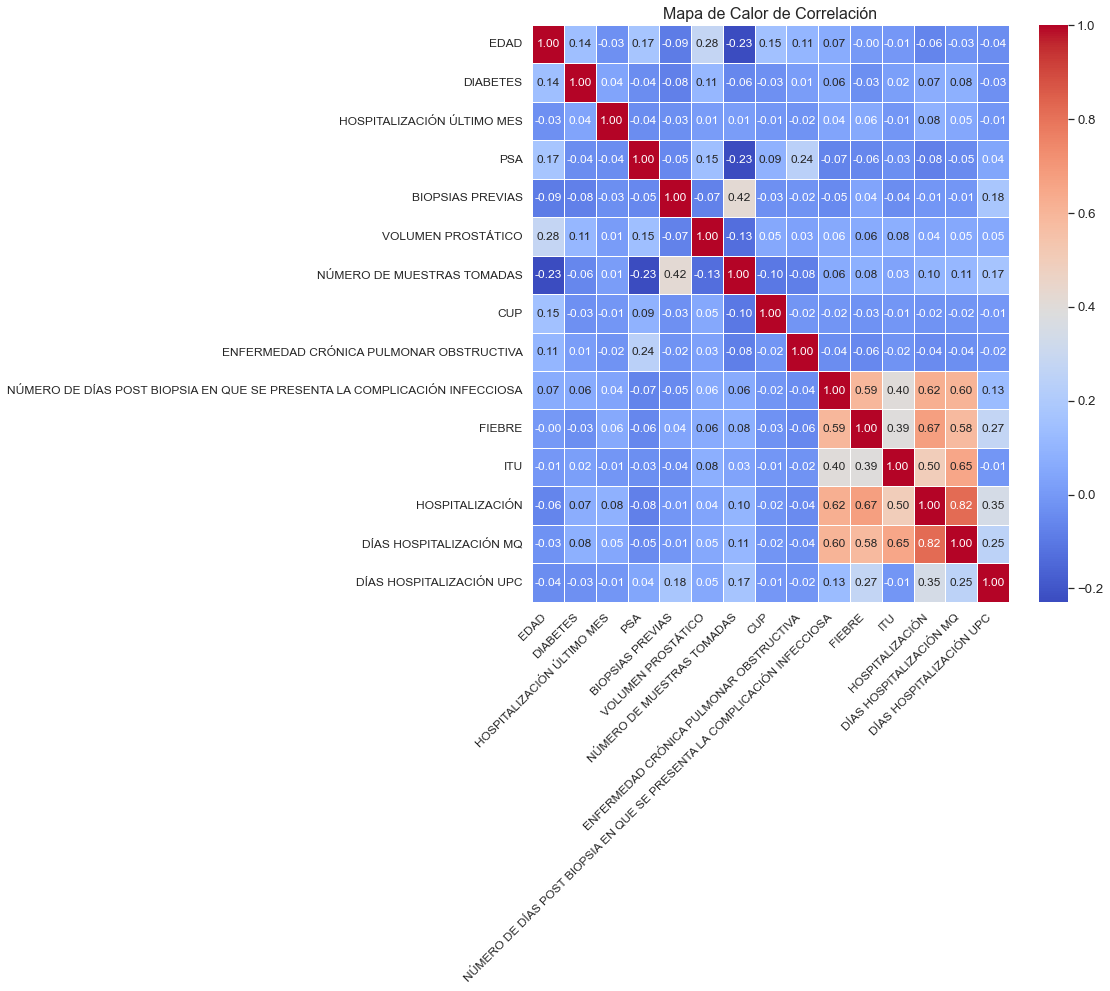

In [102]:
# Calcula la correlación
corr = df.corr()

# Configura el estilo y tamaño del gráfico
plt.figure(figsize=(16, 14))
sns.set(font_scale=1.2)

# Crea el mapa de calor
sns.heatmap(corr, cbar=True, square=False, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, annot_kws={'size': 12})

# Configura las etiquetas y límites
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Mapa de Calor de Correlación', fontsize=16)

# Ajusta el diseño para una mejor visualización
plt.tight_layout()

# Muestra el mapa de calor
plt.show()


In [101]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ÚLTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTÁTICO,ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS,NÚMERO DE MUESTRAS TOMADAS,CUP,ENFERMEDAD CRÓNICA PULMONAR OBSTRUCTIVA,BIOPSIA,NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRÓN DE RESISTENCIA,HOSPITALIZACIÓN,DÍAS HOSPITALIZACIÓN MQ,DÍAS HOSPITALIZACIÓN UPC
0,53,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,NEGATIVO,1,1,0,NO,NO,NO,1,2,0
1,56,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,NEGATIVO,1,1,0,NO,NO,NO,1,5,0
2,57,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,24,0,0,NEGATIVO,1,1,0,HEMOCULTIVO,E.COLI,"R AMPI, R CIPRO, R GENTA, R SULFA",1,4,3
3,56,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,NEGATIVO,1,1,0,NO,NO,NO,1,5,0
4,55,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,24,0,0,NEGATIVO,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,55,0,0,5.0,0,0,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,ADENOCARCINOMA GLEASON 7,0,0,0,NO,NO,NO,0,0,0
427,70,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,NEGATIVO,0,0,0,NO,NO,NO,0,0,0
428,75,0,0,75.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,ADENOCARCINOMA GLEASON 8,0,0,0,NO,NO,NO,0,0,0
429,67,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLUCÓSIDO,12,0,0,ADENOCARCINOMA GLEASON 6,0,0,0,NO,NO,NO,0,0,0


Se ha identificado que las variables **'HOSPITALIZACIÓN ULTIMO MES**,**CUP**,**ENFERMEDAD CRÓNICA PULMONAR OBSTRUCTIVA**,**ITU**,**NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA**,**TIPO DE CULTIVO**,**AGENTE AISLADO**,**PATRÓN DE RESISTENCIA**,**DIAS HOSPITALIZACION MQ**,**DIAS HOSPITALIZACIÓN UPC** exhiben un fenómeno donde el 99% o cerca, los datos pertenecen a una única categoría, por lo tanto es irrelevante continuar con estas c olumnas. En consecuencia, se ha tomado la decisión de eliminar estas variables del conjunto de datos.

In [125]:
df_1 = df.copy()

In [126]:
df_1.drop(columns=['HOSPITALIZACIÓN ÚLTIMO MES','CUP','ENFERMEDAD CRÓNICA PULMONAR OBSTRUCTIVA','ITU',
"NÚMERO DE DÍAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA",'TIPO DE CULTIVO', 'AGENTE AISLADO',
'PATRÓN DE RESISTENCIA','DÍAS HOSPITALIZACIÓN MQ','DÍAS HOSPITALIZACIÓN UPC'], inplace=True)
df_1.columns

Index(['EDAD', 'DIABETES', 'PSA', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTÁTICO',
       'ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS', 'NÚMERO DE MUESTRAS TOMADAS',
       'BIOPSIA', 'FIEBRE', 'HOSPITALIZACIÓN'],
      dtype='object')

In [128]:
# Separar columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear una copia del DataFrame original
#encoded_df = df.copy()

# Aplicar label encoding a las columnas categóricas
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_1[col] = label_encoder.fit_transform(df_1[col])

# Mostrar el DataFrame codificado
df_1

KeyError: 'TIPO DE CULTIVO'

In [129]:
df_1

,EDAD,DIABETES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTÁTICO,ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS,NÚMERO DE MUESTRAS TOMADAS,BIOPSIA,FIEBRE,HOSPITALIZACIÓN
0,53,0,4.0,0,1,1,12,7,1,1
1,56,0,7.7,0,1,1,12,7,1,1
2,57,0,29.0,1,1,1,24,7,1,1
3,56,0,7.0,0,1,1,12,7,1,1
4,55,0,29.0,1,1,1,24,7,1,1
...,...,...,...,...,...,...,...,...,...,...
426,55,0,5.0,0,0,1,12,2,0,0
427,70,1,18.0,0,1,1,12,7,0,0
428,75,0,75.0,0,1,1,12,3,0,0
429,67,0,6.0,0,1,1,12,1,0,0


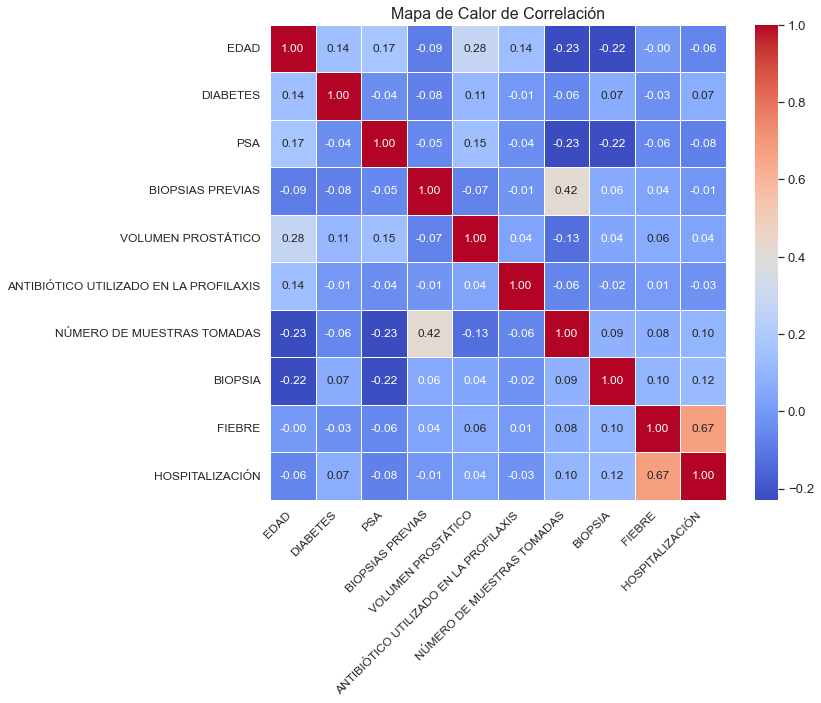

In [130]:
# Calcula la correlación
corr = df_1.corr()

# Configura el estilo y tamaño del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)

# Crea el mapa de calor
sns.heatmap(corr, cbar=True, square=False, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, annot_kws={'size': 12})

# Configura las etiquetas y límites
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Mapa de Calor de Correlación', fontsize=16)

# Ajusta el diseño para una mejor visualización
plt.tight_layout()

# Muestra el mapa de calor
plt.show()

Guardamos los cambios en archivos csv

In [131]:
df_t = 'D:\\Disco C.2\\SOYHENRY\\Mis Proyectos El Mayki\\Proyecto_Integrador_M6\\ProyectoHospitalizacion\\2. EDA\\Hospitalizacion_t.csv'
df_nt = 'D:\\Disco C.2\\SOYHENRY\\Mis Proyectos El Mayki\\Proyecto_Integrador_M6\\ProyectoHospitalizacion\\2. EDA\\Hospitalizacion_nt.csv'

df.to_csv(df_t, index=False, encoding='utf-8')
df_1.to_csv(df_nt, index=False, encoding='utf-8')